# Analysis of Opportunity Youth in South King County:

## Setting the Scene:
This project offers an updated estimate of the number of Opportunity Youth in South King County using the 2017 5-year American Community Survey (ACS) Public Use Microdata Survey (PUMS).

### Aims:

Our aims are 3 fold:
- We are trying to give an updated estimate on the number of Opportunity Youth in South King County
- Our goal is not to make any concrete conclusions about this population but rather get a closer look of what this group of people looks like. 
    - We deep dive into looking at 2 characteristics defining opporunity youth:  education and employment. 
    - We compare the oy population with the non-oy population in regards to these 2 categories.
- Observe any trends between the 2014 data and our current data 

### How do we define OY and SKC?

- We define OY as people between the ages of 16 and 24 who are both displaced from school and work. 
     - We define non-oy population as being people between the ages of 16 and 24 who are either working or are in school. 
- We define SKC using the puma codes as per the ACS website.  The puma codes we used to define SKC were:
    - 11612, 11613, 11614, 11615
    - We defined it as any of the King County regions 
- It should be noted that the area used in the 2014 data was defined differently so our data is not a 1:1 match

### Analysis Takeaways for Future Investigation:

- What role does education attainment play in defining OY?
- Motivation to work defined by 'available to work' and 'looking for work'
- What life style factors influence 16-24yos to be disengaged from work and school?
- Highlight the need to get a better understanding of the OY population by looking into the defining factors of Opportunity Youth; i.e. education and employment.

# EDA:

## Data Cleaning/Processing:

### Imports:

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from src.data_cleaning import data_cleaning as dc

### Where did we get our data from?

- We sourced our data from the ACS website and primarily worked with the 2017 5-year persons PUMS data. 
    - The tables we used to collate our data from were:
        - pums_2017:  This table gave us data on weighted individuals
        - puma_names_2010:  This table gave us information about the puma codes and labels
        - wa_geo_xwalk:  This table gave us geographical information on our data

#### Defining SKC:
- To define the South King County are, we utilised the puma_names_2010 data table
- By using the state column, we were able to filter down to data for Washington 
- Using the Tigerweb app, we were able to identify the 16 puma codes that define King County.  Thus, we were able to filter down to all of the King County data.

In [8]:
king_county = dc.create_kc_df()
king_county

,state_fips,state_name,cpuma0010,puma,geoid,gisjoin,puma_name
32,53,Washington ...,1039,11601,5311601,G53011601,Seattle City (Northwest) ...
33,53,Washington ...,1040,11602,5311602,G53011602,Seattle City (Northeast) ...
34,53,Washington ...,1041,11603,5311603,G53011603,Seattle City (Downtown)--Queen Anne & Magnolia...
35,53,Washington ...,1042,11604,5311604,G53011604,Seattle City (Southeast)--Capitol Hill ...
36,53,Washington ...,1043,11605,5311605,G53011605,Seattle City (West)--Duwamish & Beacon Hill ...
37,53,Washington ...,1044,11606,5311606,G53011606,"King County (Northwest)--Shoreline, Kenmore & ..."
38,53,Washington ...,1044,11607,5311607,G53011607,"King County (Northwest)--Redmond, Kirkland Cit..."
39,53,Washington ...,1044,11608,5311608,G53011608,King County (Northwest Central)--Greater Belle...
40,53,Washington ...,1044,11609,5311609,G53011609,"King County (Central)--Sammamish, Issaquah, Me..."
41,53,Washington ...,1044,11610,5311610,G53011610,"King County (Central)--Renton City, Fairwood, ..."


- From here, we decided to define South King County as all of the puma names that identified 'South' in the puma name.  This reduced us down to 4 puma codes:

In [9]:
skc_pumas = dc.create_skc_puma_df()
skc_pumas

,state_fips,state_name,cpuma0010,puma,geoid,gisjoin,puma_name
42,53,Washington ...,1044,11613,5311613,G53011613,King County (Southwest Central)--Kent City ...
43,53,Washington ...,1044,11614,5311614,G53011614,King County (Southwest)--Auburn City & Lakelan...
44,53,Washington ...,1044,11615,5311615,G53011615,"King County (Southeast)--Maple Valley, Covingt..."
47,53,Washington ...,1046,11612,5311612,G53011612,"King County (Far Southwest)--Federal Way, Des ..."


This is what we chose to be our final definition of South King County to perform our analysis on.

#### Defining OY:
- The 2017 pums data table gave us access to 286 features relating to (weighted) individual persons.  
- We then made judgement calls on the most appropriate features to include in order to answer our initial exploratory questions. 
- We first chose the features that would help us define the OY population.  This included selecting the features:
    - 'Age' - this feature allows us to isolate the relevant age range of the OY pop.
    - 'Employment Status' - this allows us to query the employment status of an individual so that if they aren't employed **and** not in school, we can categorise them as OY 
    - 'School Enrollment' - this allows us to query the school enrollment of an individual (same as above)
    - 'Person Weights' - since this was just a sample of the skc population, it was important to include this feature in order to get the correct person-weighting scaling of the data
    - We also used the 'serialno' feature as an 'id' identifier for each row
- Since OY are defined by employment and education, it seemed fitting to include more features relating to those two fields, as they might prove useful throughout our exploration.  Thus, we also chose to include:
    - 'Grade Attending' - this would help us if we wanted more insight on the non-oy pop for comparison sake
    - 'Education Attained' - this would help us see the distribution of what levels of education OYs have obtained
    - 'Absent from work' - this allows us to investigate further into the OY that may be unemployed but may just be absent from work
    - 'Available for work' - this will allow us to query how many OY are available for work in comparison to the non-oy pop and if there are any significant differences between the 2 pops
    - 'Looking for work' - this will allow us to investigate how many OY are actively searching for work (again in comparison to non-oy) and how many are unemployed and not looking for work
    - 'Layoff from work' - this feature will let us see how many OY may be on layoff from work. 
- We of course had to also include the 'puma' feature so that we could refine our data set to SKC as per the puma codes we found from the puma_names_2010 table 
- Note that we also updated the column names to something more readable
- We then filtered down to the appropriate OY age range:  16-24, so that our data set only contained individuals who were between 16 and 24

In [10]:
skc_df = dc.skc_df()
skc_df.head()

,id,age,sex,person_weight,puma,school_enrollment,education_attained,employment_status,avail_for_work,look_for_work,absent_from_work,layoff
32,2013000007063,19.0,1,30.0,11612,2,18,6,5,2,2,2
36,2013000008046,17.0,2,36.0,11613,2,13,6,5,2,2,2
48,2013000011255,17.0,2,13.0,11614,2,12,6,5,2,2,2
54,2013000012970,21.0,2,29.0,11612,3,18,6,5,2,2,2
57,2013000013525,18.0,2,24.0,11613,2,15,6,5,2,2,2


- Finally, it became obvious that it would be helpful to be able to easily know whether an individual row was OY or not and to break the age range into 3 groups.  This lead to adding 2 new columns to our dataframe:
    - 'is_oy' - this is a boolean column that holds True if the row is an OY and False otherwise.  This column was created by using a list comprehension and querying the 'employment status' and 'school enrollment' columns
    - 'age_group' - this column categorised each person into 3 age groups:  'Ages 16-18', 'Ages 19-21', 'Ages 22-24'.  
        - We decided to use these three age groups:
        1. because the data from the 2016 report categorised their data in this way so it would allow for comparisons and 
        2. because these age groups seem representative of slightly different life stages
- Our final dataframe now looks like:

In [39]:
skc_df = dc.add_cols_skc(skc_df)
skc_df.head()

,id,age,sex,person_weight,puma,school_enrollment,education_attained,employment_status,avail_for_work,look_for_work,absent_from_work,layoff,age_group,is_oy
32,2013000007063,19.0,1,30.0,11612,2,18,6,5,2,2,2,Ages 19-21,False
36,2013000008046,17.0,2,36.0,11613,2,13,6,5,2,2,2,Ages 16-18,False
48,2013000011255,17.0,2,13.0,11614,2,12,6,5,2,2,2,Ages 16-18,False
54,2013000012970,21.0,2,29.0,11612,3,18,6,5,2,2,2,Ages 19-21,False
57,2013000013525,18.0,2,24.0,11613,2,15,6,5,2,2,2,Ages 16-18,False


### What assumptions did we make when picking these features?

- When picking these features, we assumed that each row could only have one possible value for each column.  e.g. 'education_attained' would not specify a number correlating to each grade of school attended, but rather the highest level of education they've attained.  
- We are assuming that we don't have risk of 'double counting' if, for example, someone who is unemployed could also be categorised as 'absent from work' and/or laid off.

### What problems did we face when working with the data?

- Discrepancy in how SKC was defined in the 2014 data set 
    - When trying to compare our 2017 data with the 2014 data, it was difficult to define SKC in the same way that the 2016 report seemed to.  
    - We then needed to find a way to scale our data so that we could make reasonable comparisons
- Further investigation needs to be done in order to determine if someone who is unemployed could also be categorised as 'absent from work' and/or laid off
    - If this is the case, we need to define how we determine 'unemployed' - is it simply being registered as 'unemployed' or does it need to take into account these other two possibilities

### How did we overcome these problems?

- We chose to compare the 2014 vs. 2017 data using percentages to display the proportions of the categorised populations

## Data Analysis:
This analysis was completed in four stages:
1. A map was generated to help visualise the part of King County that are a part of South King County.

2. An updated estimate of the number of Opportunity Youth in South King County as well as a breakdown of this count by age group, PUMA code, educational attainment and employment availability.  

3. An update of the table "Opportunity Youth Status by Age" from the 2016 report "Opportunity Youth in the Road Map Project Region".

4. A visualisation highlighting a trend between the 2014 data and the current 2017 data.


# Analysis Part 1:
## Visualizations of King County and South King County

First, we must import the necessary libraries to display our plots.

In [2]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Next,we must find a shapefile that displays King County and has the necessary Public Use Microdata Area (PUMA) codes. We accomplish through Geopandas and the Matplotlib.pyplot libraries.

,CHNG_TYPE,EFF_DATE,RELATE,NAME,POP10,PARTFLG,VINTAGE,Z_MIN,Z_MAX,STATEFP10,PUMACE10,PUMAold,geometry
0,None,None,None,Downtown Seattle-Queen Anne-Magnolia,116891,None,None,0.0,0.0,None,11603,01803,"POLYGON ((-122.34484 47.59922, -122.34474 47.6..."
1,None,None,None,Capitol Hill-Southeast Seattle,107411,None,None,0.0,0.0,None,11604,01804,"POLYGON ((-122.25574 47.64712, -122.25909 47.6..."
2,None,None,None,West Seattle-Duwamish-Beacon Hill,127812,None,None,0.0,0.0,None,11605,01805,"POLYGON ((-122.27007 47.50966, -122.27155 47.5..."
3,None,None,None,Burien-SeaTac-Tukwila,123856,None,None,0.0,0.0,None,11611,02006,"POLYGON ((-122.21746 47.44117, -122.21759 47.4..."
4,None,None,None,Renton,126620,None,None,0.0,0.0,None,11610,02005,"POLYGON ((-122.12208 47.50248, -122.12208 47.5..."


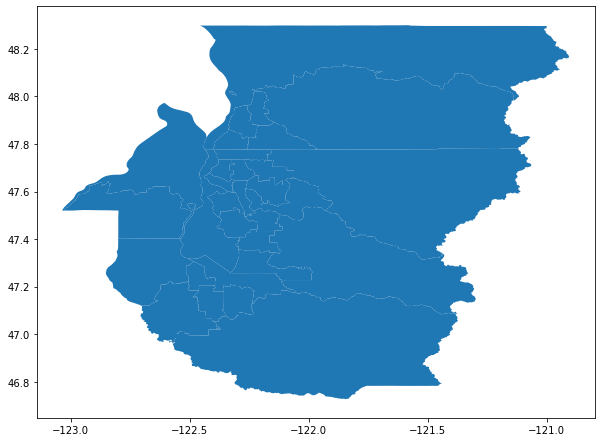

In [3]:
#Loading a Shapefile that contains the King Region and displaaying the first 5 rows to see what kind of information the file contains.
kr=gpd.read_file('../../src/data/shapefiles/reg10puma_0/reg10puma.shp')
kr.plot(figsize= (10,10))
kr.head()


Now that we have a plot that is of the King Region we can locate King County within it, and we can isolate it based on a list of PUMA codes. We will use the "PUMACE10" column to do this.

,CHNG_TYPE,EFF_DATE,RELATE,NAME,POP10,PARTFLG,VINTAGE,Z_MIN,Z_MAX,STATEFP10,PUMACE10,PUMAold,geometry
0,None,None,None,Downtown Seattle-Queen Anne-Magnolia,116891,None,None,0.0,0.0,None,11603,01803,"POLYGON ((-122.34484 47.59922, -122.34474 47.6..."
1,None,None,None,Capitol Hill-Southeast Seattle,107411,None,None,0.0,0.0,None,11604,01804,"POLYGON ((-122.25574 47.64712, -122.25909 47.6..."
2,None,None,None,West Seattle-Duwamish-Beacon Hill,127812,None,None,0.0,0.0,None,11605,01805,"POLYGON ((-122.27007 47.50966, -122.27155 47.5..."
3,None,None,None,Burien-SeaTac-Tukwila,123856,None,None,0.0,0.0,None,11611,02006,"POLYGON ((-122.21746 47.44117, -122.21759 47.4..."
4,None,None,None,Renton,126620,None,None,0.0,0.0,None,11610,02005,"POLYGON ((-122.12208 47.50248, -122.12208 47.5..."


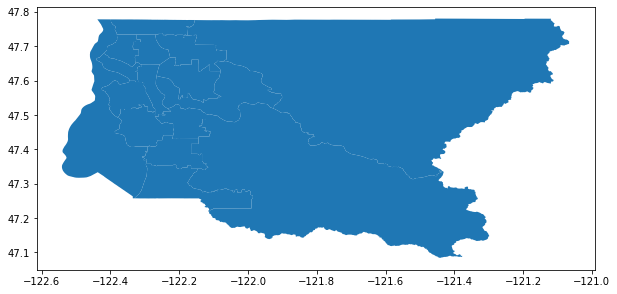

In [4]:
kc_puma_codes = ['11613', '11614', '11615','11616','11606','11607','11608','11609','11610','11611','11612','11605','11604','11603','11602','11601']
kc = kr[kr['PUMACE10'].isin(kc_puma_codes)]
#Using a list of known King County codes to filer the plot to just King County and assigning it to the variable "kc"   
kc.plot(figsize= (10,10));
kc.head()
#plotting the figure and the first 5 rows of data to make sure it was filtered fully

Great now that we have our King County plot lets be even more precise and create a plot that is for the Southern parts of King County based on PUMA indetification codes.

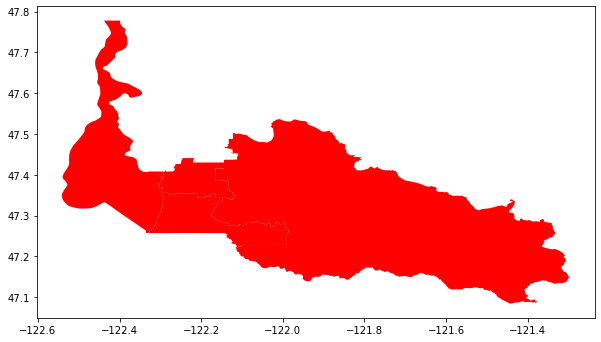

In [5]:
skc_puma_codes = ['11613', '11614', '11615', '11612']
#Creating a list of Southern PUMA codes as noted on PUMS website
skc = kc[kc['PUMACE10'].isin(skc_puma_codes)]
#Looking for the codes in the King county dataframe and assigning it to skc
skc.plot(facecolor= 'red',figsize= (10,10));
#plotting the results of the sck 



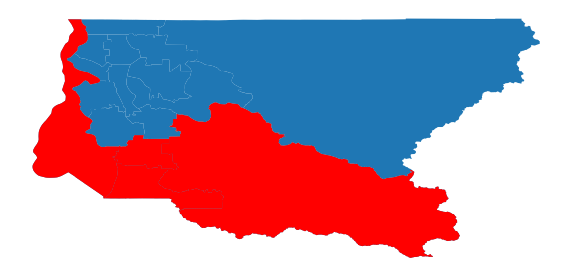

In [6]:
fig, ax = plt.subplots(1,1,figsize =(10,10))
kc.plot(ax=ax)
ax.set_axis_off()
#plt.title('Southern King County',)
skc.plot(ax=ax, facecolor='red');
#Setting up a subplots figure and over laying the sck ontop of the kc graphs to propely demonstrate th

And just like that we have our Southern King County filled in and graphed

## **Creating A Choropleth Graph using the King County**

To create our Choropleth graph we will need to use the "POP10" Column from kc and find a shapefile that contains an Area/Acres of King county

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         1580 non-null   int64   
 1   FIPSSTCO   1580 non-null   object  
 2   TRACT      1580 non-null   object  
 3   GROUP      1580 non-null   object  
 4   STFID      1580 non-null   object  
 5   AREA       1580 non-null   float64 
 6   PERIMETER  1580 non-null   float64 
 7   ACRES      1580 non-null   float64 
 8   SQMILES    1580 non-null   float64 
 9   OCHUACRE   1580 non-null   float64 
 10  TRACTBG    1580 non-null   object  
 11  STF_STR    1580 non-null   object  
 12  STF2       1580 non-null   object  
 13  WLKTIME_1  1580 non-null   float64 
 14  TRTIME_1   1580 non-null   float64 
 15  WDIST_1    1580 non-null   float64 
 16  PWT_1      1580 non-null   float64 
 17  WLKTIME_2  1580 non-null   float64 
 18  TRTIME_2   1580 non-null   float64 
 19  WDIST_2    1580 non

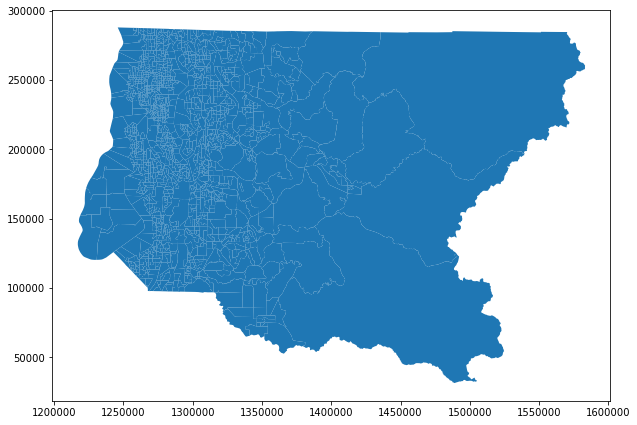

In [7]:
tp=gpd.read_file('../../src/data/shapefiles/king00bg/king00bg.shp')
tp.plot(figsize= (10,10))
tp.info()
#Loading in a Shape file that contains both an "Area" and "Acres" column

Next,

In [8]:
choro_kc=kc[(kc.POP10>0)]
choro_kc['Population_Density']=choro_kc.POP10/sum(tp.ACRES)*100   
#Tlking the Population value from the King county table where values are grater than 0
#Next we create a Population_Density Colum in the "choro_kc" datafram where the choro_kc population colum is divided by the sum of totale Acres and will iterate throguh that per Puma Code 

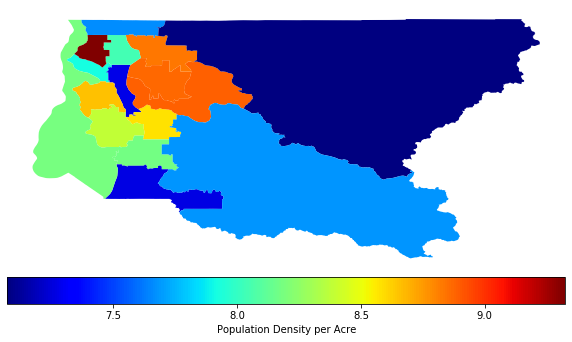

In [9]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1,1, figsize= (10,10))
#Creating our figure and import the map tools kit
divider = make_axes_locatable(ax)
#this makes our choropleth grpahs axes accesible
cax = divider.append_axes("bottom", size="10%", pad=0.1)
ax.set_axis_off()
#this will turn axies off so no view of the latitude and Longitude to make graph have a cleaner look
choro_kc.plot(column='Population_Density',cmap= 'jet', ax=ax,legend=True,cax=cax, legend_kwds={'label': "Population Density per Acre",'orientation': "horizontal"});
#This las line adjust the color of the map to be easier on the yes and aligns the axes of the legend and graph as well as a label for the Legend and orients it to the bottom horizontally

# Analysis Part 2:
In Part 2 of this analysis, we find an updated estimate on the number of Opportunity Youth in South King County.

We will then dive deeper into this population by breaking down the number of Opportunity Youth by puma code, age groups, educational attainment and employment availability. 

### 1. Updated Population Estimate of OY:
Using the person weights from the 2017 pums data, we found an updated estimate of the Opportunity Youth in South King County to be 6723.

To generate this number, a pandas dataframe was created in an iterative way to isolate the OY population in South King County.  

As mentioned in the introduction of this analysis, functions were created to generate a dataframe of the South King County population of 16-24 years with columns added to categorise into age groups and whether a row is OY or not.  To count the number of OY, we isolated down to the `'is_oy' = True` population and then used the `.sum()` method on the person weights to count how many OY are is South King County:

In [4]:
# create skc df and then subset the OY population:
skc_df = dc.final_skc_df()
oy_df = skc_df[skc_df['is_oy']]
oy_df['person_weight'].sum()

6723.0

### 2. OY Population by PUMA:
We defined South King County by the following 4 puma codes:

In [5]:
puma_names = dc.create_skc_puma_df()
puma_names

,state_fips,state_name,cpuma0010,puma,geoid,gisjoin,puma_name
42,53,Washington ...,1044,11613,5311613,G53011613,King County (Southwest Central)--Kent City ...
43,53,Washington ...,1044,11614,5311614,G53011614,King County (Southwest)--Auburn City & Lakelan...
44,53,Washington ...,1044,11615,5311615,G53011615,"King County (Southeast)--Maple Valley, Covingt..."
47,53,Washington ...,1046,11612,5311612,G53011612,"King County (Far Southwest)--Federal Way, Des ..."


We can see the break down of the Opportunity Youth population by PUMA code as follows:

In [43]:
dc.puma_breakdown(oy_df)

PUMA 11612: 1977.0
PUMA 11613: 2006.0
PUMA 11614: 1530.0
PUMA 11615: 1210.0


We can see this same breakdown with the percentages of the OY per PUMA code:

- PUMA 11612 - King County (Far Southwest): 1977 - 29%

- PUMA 11613 - King County (Southwest Central): 2006 - 30%

- PUMA 11614 - King County (Southwest): 1530 - 23%

- PUMA 11615 - King County (Southeast): 1210 - 18%

This distribution of the OY population might lead to further investigations about why the Southwest regions of King County account for 82% of the OY population in South King County.  What are the differentiating factors between Southwest and Southeast King County?  

### 3. OY Population by Age Group:
We decided to break the OY population into three age groups: 16-18yo, 19-21yo, 22-24yo.  This was so we could make comparisons with the 2016 report as well as being able to capture the potentially unique circumstances of each group.  A subset of the dataframe was created to show the population breakdown by age groups as well as the corresponding percentage of the total 16-24yo population:  

In [12]:
# Create a subset of the skc_df to count the total population of 16-24yos
tot_pops_df = skc_df.groupby(['age_group']).sum().drop(columns = ['age', 'is_oy'])
tot_pops_df.rename(columns = {'person_weight': 'population'}, inplace = True)
tot_pop = tot_pops_df.sum()

# Subset the dataframe again to isolate the OY population and calculate the percentage of OY amonst the total pop.
oy_pop_df = oy_df.groupby(['age_group']).sum().drop(columns = ['age', 'is_oy'])
oy_pop_df.rename(columns = {'person_weight': 'OY population'}, inplace = True)
oy_pop_df['percentage'] = round(oy_pop_df['OY population'] / tot_pops_df['population'] * 100)
oy_pop_df

,OY population,percentage
age_group,,
Ages 16-18,1230.0,6.0
Ages 19-21,2541.0,14.0
Ages 22-24,2952.0,15.0


We can see these numbers visually in the following bar graph:

![pop_ages.png](../../reports/figures/pop_ages.png)

From this bar graph, we can see that the population of OY is highest for the 22-24 year olds and lowest for the 16-18 year olds.  This might be a trend we expect to see, since 16-18 years are more likely to still be under the supervison of family members and/or adults and so have more accountability to be in school or working.  

Further investigation into the living situations of OY 19 and older might shed light on the factors contributing to their school enrollment and employment status.  

### 4. Education Attainment Amongst Opportunity Youth:
Since education is one of the definig factors of OY, it seems necessary to investigate the levels of education this population has attained, given that they are not currently in school.  

#### OY Population with No Diploma:
We subsetted our data via education attainment category to investigate each level.  The 'No Diploma' category raised issues in how we queried the data based on the structure of the data.  It is important to note that all values in our dataframe, except 'age' and 'person weight', are strings, despite most of the response options in the survey being integer answers.  This matters because now the format of how we query each response is important.  For the 'education attainment' feature, responses 'bb' through to '15' were valid responses to mean a person had no diploma.  At first, we were making queries using the `range(1, 16)` function and then casting the values as a list.  After querying the data in this way, we noticed that we had missed a lot of the data.  Upon further investigation into the format of the response data, we saw that single-digit responses in the 'education attainment' column were listed with a '0' before the number, e.g. '01' rather than '1'.  This meant our `range()` function was missing all single-digit responses:

In [13]:
# Previously we missed data because we were searching of '1' instead of '01' for single-digit values:
skc_df[skc_df['education_attained'] == '1']

,id,age,sex,person_weight,puma,school_enrollment,education_attained,employment_status,avail_for_work,look_for_work,absent_from_work,layoff,age_group,is_oy


As opposed to:

In [14]:
# vs. :
skc_df[skc_df['education_attained'] == '01']

,id,age,sex,person_weight,puma,school_enrollment,education_attained,employment_status,avail_for_work,look_for_work,absent_from_work,layoff,age_group,is_oy
4565,2013000916904,17.0,1,14.0,11614,1,01,6,5,2,2,2,Ages 16-18,True
5968,2013001189997,23.0,2,20.0,11613,1,01,6,3,2,2,2,Ages 22-24,True
7985,2014000095629,18.0,2,12.0,11613,1,01,3,1,1,3,2,Ages 16-18,True
10373,2014000564460,22.0,2,2.0,11614,1,01,6,5,2,2,2,Ages 22-24,True
14145,2014001327292,21.0,1,4.0,11614,1,01,3,1,1,2,2,Ages 19-21,True
19015,2015000781393,21.0,2,12.0,11615,1,01,1,5,2,2,2,Ages 19-21,False
21962,2015001371640,24.0,2,21.0,11614,1,01,6,5,2,2,2,Ages 22-24,True
24170,2016000305053,23.0,2,50.0,11613,1,01,1,5,3,3,3,Ages 22-24,False
26159,2016000707834,23.0,2,34.0,11613,1,01,6,5,2,2,2,Ages 22-24,True
28897,2016001245397,21.0,1,5.0,11614,1,01,1,5,3,3,3,Ages 19-21,False


So we created a pad function to cast the single digit entries to include a '0' before them:

In [15]:
# Create function to add 0's to single-digit entries: - function located in data_cleaning.py
def pad(num):
    if num < 10:
        return f'0{num}'
    else: 
        return str(num)  

Thus, we were able to find all valid 'no diploma' entries as follows:

In [16]:
# What is the total number of 16-24 OY with no diploma?  Valid entries:  bb-15.
no_dip = ['bb'] + list(map(pad, range(1, 16)))

In [17]:
no_dip_oy_df = oy_df[oy_df['education_attained'].isin(no_dip)]
no_dip_oy_df

,id,age,sex,person_weight,puma,school_enrollment,education_attained,employment_status,avail_for_work,look_for_work,absent_from_work,layoff,age_group,is_oy
288,2013000058010,17.0,2,45.0,11614,1,13,6,5,2,2,2,Ages 16-18,True
517,2013000100470,18.0,2,16.0,11613,1,13,3,5,3,3,3,Ages 16-18,True
610,2013000118713,23.0,2,25.0,11613,1,14,6,5,2,2,2,Ages 22-24,True
796,2013000155051,19.0,2,2.0,11614,1,14,6,5,2,2,2,Ages 19-21,True
1028,2013000204235,17.0,1,17.0,11613,1,13,6,5,2,2,2,Ages 16-18,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35945,2017001151675,17.0,2,26.0,11612,1,14,6,5,3,3,3,Ages 16-18,True
36211,2017001208143,17.0,1,16.0,11612,1,13,6,5,2,2,2,Ages 16-18,True
37134,2017001386502,18.0,1,17.0,11613,1,11,6,5,3,3,3,Ages 16-18,True
37718,2017001470135,23.0,1,17.0,11613,1,14,6,5,3,3,3,Ages 22-24,True


For the remaining 'education attainment' categories, we queried the data in a similar fashion as above.  This lead us to creating the following visualisation:

![education_oy.png](../../reports/figures/education_oy.png)

Across all ages, 49% of Opportunity Youth had a high school diploma or a GED.  We can see from the figure above that, when broken down by age group, we can see that 55% of 19-21yo and 48% of 22-24yo have achieved a high school diploma or GED whereas 58% of the 16-18yo have not attained a diploma.  This is not too surprising given that people between 16-18 years old are 'school aged', so it is typical to see 16-18yo without a diploma.  Further investigation into these circumstances is necessary.  

### 5. Opportunity Youth Looking for Work:
As employment is the second defining factor of Opportunity Youth, it is compelling to look into the motivations Opportunity Youth have toward seeking employment.  

We queried the 'looking for work' category in a similar way to how we queried education.  The valid responses were:

b = N/A (less than 16 years old/at work/temporarily absent/informed of recall)

1 = Yes

2 = No

3 = Did not report

Again, all these numbers were string values in our data.  While we could have cast all our data to `int`, we chose to handle it on an add-needs basis.  We also considered renaming the responses to something mor readable but again, decided for our purposes it was not necessary.

In [20]:
# Create list of relevant responses:
response = ['1', '2', '3']

# Query the number of OY who are looking for work:
oy_df[oy_df['look_for_work'] == '1']['person_weight'].sum()

2107.0

We continued in this way to develop an understanding of the percentage of OY looking for work and then generated the following visualisation:

![oy_lfw.png](../../reports/figures/oy_lfw.png)

While 12% of the data was not reported, 56.7% of Opportunity Youth reported 'No' in the survey, in response to the category 'Looking for Work' (80% of which came from ages 19-24).  This sparks the question "why are Opportunity Youths not looking for work if they are neither in school or working?".  

## Summary
Our analysis so far has highlighted the need for further investigation into the education and employment status' of the Opportunity Youth.  

Variables such as motivation for seeking education or employment, living circumstances and accountability systems for each age group require further research to gain a deeper understanding of the characteristics defining Opportunity Youth.

# Analysis Part 3:
In Part 3 of this analysis, we present updates on the "Opportunity Youth Status by Age" table from the 2016 report "Opportunity Youth in the Road Map Project Region".
 
We also highlight the discrepancies that are present between the two data sets.

The data attained in this part of the analysis was queried in the same way as previously mentioned in part 2, so the lines of code used to select these figures from the dataframe has been omitted to avoid repitition.  

First, we take a look at the 2014 data, as reported in 2016.

# Table from 2016 Report:
![2016_table.png](../../reports/figures/2016_table.png)

As mentioned earlier, the specifics are unclear as to how the 2016 report defined the South King County region.  We believe this had an effect on the total population size that was reported.  

Further to this, the 2016 report did not include people who were 'working without a diploma' in the 'Non-Opportunity Youth' category.  This conflicted with our definition of what constitutes an Opportunity Youth and so we chose to include 'working without a diploma' persons in our count for 'Non-Opportunity Youth' persons.  You will see in our updated table that we have shared the number of people who are working without a diploma, however, these people were already counted in our 'Not an Opportunity Youth' count, so we did not add them to our total counts to avoid double counting them.  
# Table from 2020 Report:
![2020_table.png](../../reports/figures/2020_table.png)

Firstly, the significant difference between the size of the population reported in 2016 versus the size of the population we have calculated can be attributed to how we defined South King County.  

When comparing the tables, a similarity between the proprtion of the populations is evident.  For example, in the 2016 report, 13% of the total (16-24yo) population was reported as Opportunity Youth.  Similarily, we have found that 12% of the total (16-24yo) population was Opportunity Youth.  This can be seen in the bar graph below where we also highlight the similarities in the proportions of OY by each age group across the two reporting years:

![perc_totpop.png](../../reports/figures/perc_totpop.png)

We can also see that the distribution of age groups is also fairly similar between the 2014 data and 2017 data.  As was noted in part 2 of this analysis, there is an upward trend in the OY population by age; that is, the lowest portion of the population is the 16-18yo and the highest portion lies in the 22-24yo group.  We see a similar trend in the 2014 data as can be seen here.  

![16vs20_perc.png](../../reports/figures/16vs20_p.png)

# Summary
In part 3 of this analysis, we discussed the similarities between the 2016 findings and our own.  We saw that while the sampling region of the two reports differed, resulting in a larger reported population for the 2016 report, the **proportions** of the OY population remained much the same between the 2014 and 2017 data.   

# Analysis Part 4:

In this section we were looking for a trend between the 2016 report and our current data.

Reviewing the data provided by the 2016 report and comparing it to the numbers generated by our analysis in 2 & 3  we were struck by what appeared to be a remarkable drop in the number of OY.

While there is a significant difference in the number of OY in the data collected, when  the data is reframed to consider the makeup of the age groups by percentage rather than headcount, we see that there has not been a significant change in the overall makeup of the OY age groups.

## Conclusion:

This report set out to highlight areas for future investigation in order to gain a better understanding of the Opportunity Youth population.  By diving deeper into the reasons for the levels of education that the Opportunity Youth attain, and the factors that motivate Opportunity Youth to seek employment, a better understanding of this population can be formed to drive future efforts of support.  